In [2]:
import pandas as pd                      #Library for Processing; Organizing; and cleaning the data
import matplotlib.pyplot as plt          #Library for Grapical Analysis
from matplotlib.pyplot import rcParams
import numpy as np                       #Library for solving mathematical models
import random
import tensorflow as tf                 #Library for Neural Networks and Deep Learning
from tensorflow import keras
from datetime import datetime
import datetime as dt
import collections                      #Library for collection of data(Tuples)
from collections import Counter
import os
import seaborn as sns                   #Library for Data Visualization 

from sklearn.model_selection import train_test_split      #Library for splitting the dataset
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression         #Library for the Linear model and its Regression
from sklearn import metrics
from sklearn.metrics import confusion_matrix              #For Confusion Matrix
from sklearn.metrics import classification_report         #For Classification metrics 
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [3]:
#Importing the data
darksky = pd.read_csv(r'C:\Users\Kowshik Kumar B\Documents\HU\500\Project\darksky.csv')  
#Accessing the first few rows of the "darksky" dataset.
darksky.head() 

time  temperature  apparentTemperature  \
0  1969-11-04 00:00:00-05:00        56.01                56.01   
1  1969-11-04 01:00:00-05:00        56.58                56.58   
2  1969-11-04 02:00:00-05:00        56.01                56.01   
3  1969-11-04 03:00:00-05:00        56.01                56.01   
4  1969-11-04 04:00:00-05:00        57.51                57.51   

   precipIntensity  precipProbability  Summary(0=Sunny, 1=Rain, 2=Snow)  \
0              NaN                NaN                                 0   
1              0.0                0.0                                 0   
2              NaN                NaN                                 0   
3              NaN                NaN                                 0   
4              0.0                0.0                                 0   

   dewPoint  humidity  pressure  windSpeed  windGust  windBearing  cloudCover  \
0     55.81      0.99    1012.9       6.42       NaN        167.0         1.0   
1     55.22      0.95    1012.2       8.73       NaN        168.0         1.0   
2     55.81      0.99    1012.0       8.70       NaN        169.0         1.0   
3     55.04      0.97    1011.0       8.86       NaN        150.0         1.0   
4     55.26      0.92    1010.8       6.96       NaN        138.0         1.0   

   uvIndex  visibility  ozone  
0      0.0       0.120    NaN  
1      0.0       0.274    NaN  
2      0.0       0.000    NaN  
3      0.0       0.000    NaN  
4      0.0       0.455    NaN

In [5]:
#Accessing the last few rows of the "darksky" dataset.
darksky.tail() 

time  temperature  apparentTemperature  \
438229  2019-11-03 19:00:00-05:00        49.13                46.65   
438230  2019-11-03 20:00:00-05:00        47.95                45.40   
438231  2019-11-03 21:00:00-05:00        46.56                44.57   
438232  2019-11-03 22:00:00-05:00        45.08                43.36   
438233  2019-11-03 23:00:00-05:00        43.96                43.96   

        precipIntensity  precipProbability  Summary(0=Sunny, 1=Rain, 2=Snow)  \
438229              0.0                0.0                                 0   
438230              0.0                0.0                                 0   
438231              0.0                0.0                                 0   
438232              0.0                0.0                                 0   
438233              0.0                0.0                                 0   

        dewPoint  humidity  pressure  windSpeed  windGust  windBearing  \
438229     28.13      0.44    1022.3       5.96      5.96        278.0   
438230     28.32      0.46    1022.9       5.67      5.67        281.0   
438231     28.20      0.49    1023.6       4.42      4.42        294.0   
438232     28.34      0.52    1024.3       3.79      3.79        308.0   
438233     27.89      0.53    1024.9       1.76      1.76        302.0   

        cloudCover  uvIndex  visibility  ozone  
438229        0.27      0.0       9.602  331.5  
438230        0.10      0.0      10.000  330.2  
438231        0.00      0.0       9.832  328.1  
438232        0.00      0.0       9.448  326.5  
438233        0.00      0.0       9.493  326.1

In [8]:
#Checking total number of NA values in each variable of the "darksky" dataset.
darksky.isna().sum() 

time                                     0
temperature                              6
apparentTemperature                      6
precipIntensity                        990
precipProbability                      990
Summary(0=Sunny, 1=Rain, 2=Snow)         0
dewPoint                                30
humidity                                32
pressure                                 9
windSpeed                                8
windGust                            229803
windBearing                           1581
cloudCover                              80
uvIndex                                 50
visibility                             288
ozone                               429470
dtype: int64

In [10]:
#Checking for the dimensions of the "darksky" dataset.
darksky.shape 

(438234, 16)

In [11]:
#Checking for datatypes of the variables in "darksky" dataset.
darksky.dtypes 

time                                 object
temperature                         float64
apparentTemperature                 float64
precipIntensity                     float64
precipProbability                   float64
Summary(0=Sunny, 1=Rain, 2=Snow)      int64
dewPoint                            float64
humidity                            float64
pressure                            float64
windSpeed                           float64
windGust                            float64
windBearing                         float64
cloudCover                          float64
uvIndex                             float64
visibility                          float64
ozone                               float64
dtype: object

In [13]:
#Checking for Summary table of the "darksky" dataset.
darksky.describe().T 

count         mean         std     min  \
temperature                       438228.0    54.515338   17.832345   -4.17   
apparentTemperature               438228.0    52.319987   21.386714  -27.10   
precipIntensity                   437244.0     0.004132    0.024592    0.00   
precipProbability                 437244.0     0.077975    0.253216    0.00   
Summary(0=Sunny, 1=Rain, 2=Snow)  438234.0     0.078433    0.311637    0.00   
dewPoint                          438204.0    42.211796   18.944959  -21.66   
humidity                          438202.0     0.655894    0.184970    0.11   
pressure                          438225.0  1016.815665    8.035204  963.30   
windSpeed                         438226.0     8.196411    4.875226    0.00   
windGust                          208431.0    12.324219    9.606461    0.00   
windBearing                       436653.0   201.387493  104.701040    0.00   
cloudCover                        438154.0     0.559727    0.385855    0.00   
uvIndex                           438184.0     1.167026    1.964675    0.00   
visibility                        437946.0     8.576883    2.420181    0.00   
ozone                               8764.0   313.243439   37.474269  208.60   

                                       25%       50%      75%        max  
temperature                         40.370    54.940    69.37   101.9000  
apparentTemperature                 35.510    54.950    69.68   114.8700  
precipIntensity                      0.000     0.000     0.00     1.9684  
precipProbability                    0.000     0.000     0.00     1.0000  
Summary(0=Sunny, 1=Rain, 2=Snow)     0.000     0.000     0.00     2.0000  
dewPoint                            27.940    43.700    58.21    79.7900  
humidity                             0.510     0.650     0.81     1.0000  
pressure                          1011.900  1016.900  1022.00  1052.7000  
windSpeed                            4.600     7.610    11.21    42.2000  
windGust                             4.440     9.160    20.42   138.1100  
windBearing                        117.000   221.000   291.00   359.0000  
cloudCover                           0.180     0.620     0.98     1.0000  
uvIndex                              0.000     0.000     2.00    10.0000  
visibility                           7.866     9.997    10.00    10.0000  
ozone                              290.800   310.900   331.90   468.9000

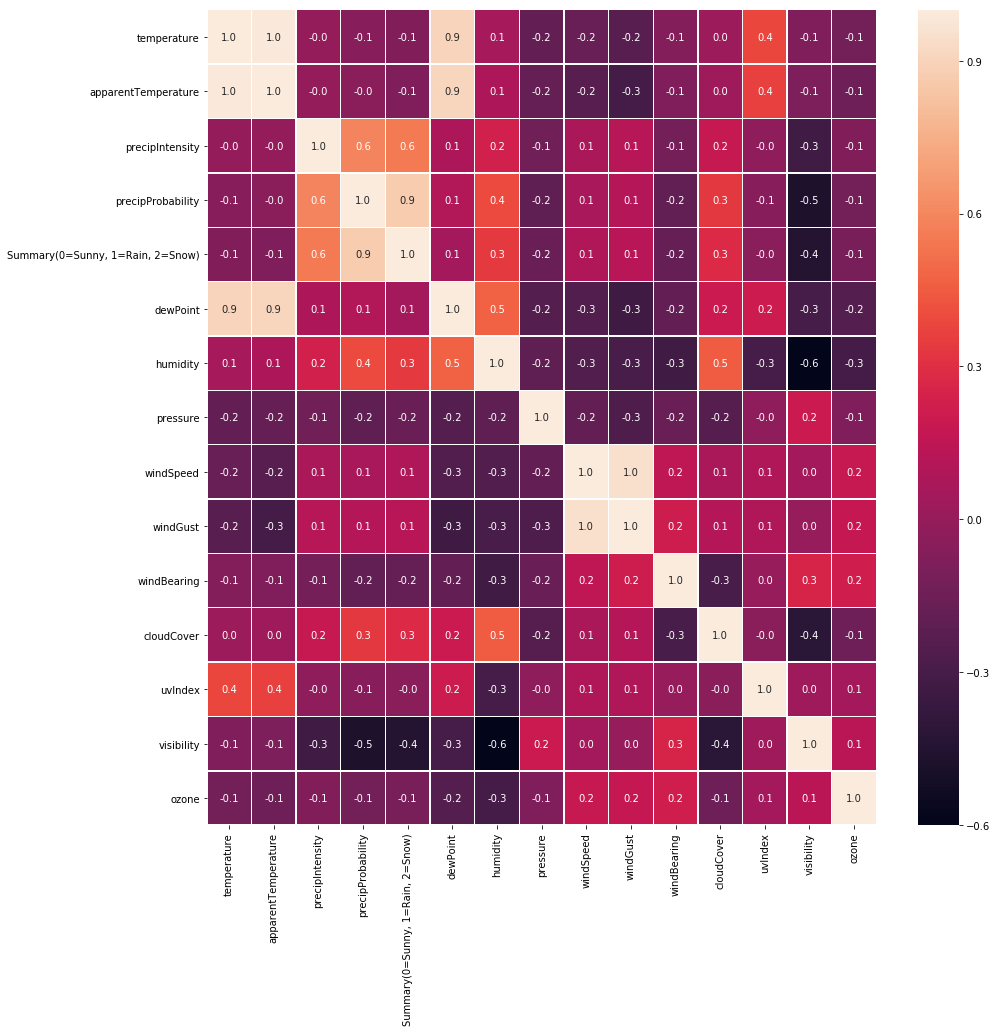

In [14]:
#Correlation Matrix of the "darksky" dataset.
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(darksky.corr(), annot= True,linewidths=0.4,fmt='.1f',ax=ax)   
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000173CC8FDCC0>,
      dtype=object)

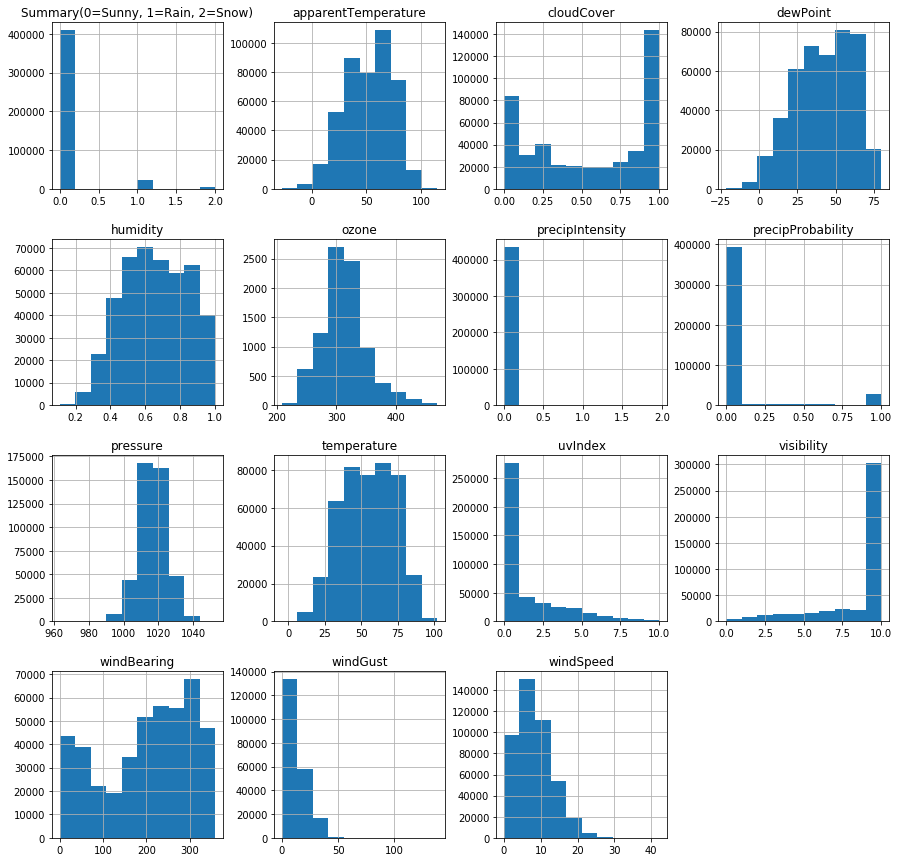

In [15]:
#Histograms of the "darksky" dataset.
rcParams['figure.figsize']=15,15
darksky.hist()  

Text(0, 0.5, 'Count of days')

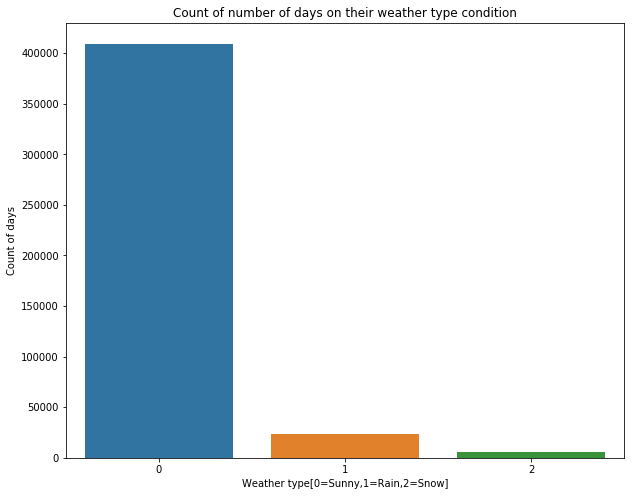

In [10]:
#Frequency plot of the categorical variable of "darksky" dataset.
plt.figure(figsize=(10,8))
sns.countplot(x=darksky['Summary(0=Sunny, 1=Rain, 2=Snow)']) 
plt.title("Count of number of days on their weather type condition")
plt.xlabel("Weather type[0=Sunny,1=Rain,2=Snow]")
plt.ylabel("Count of days")


C:\Users\Kowshik Kumar B\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Kowshik Kumar B\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


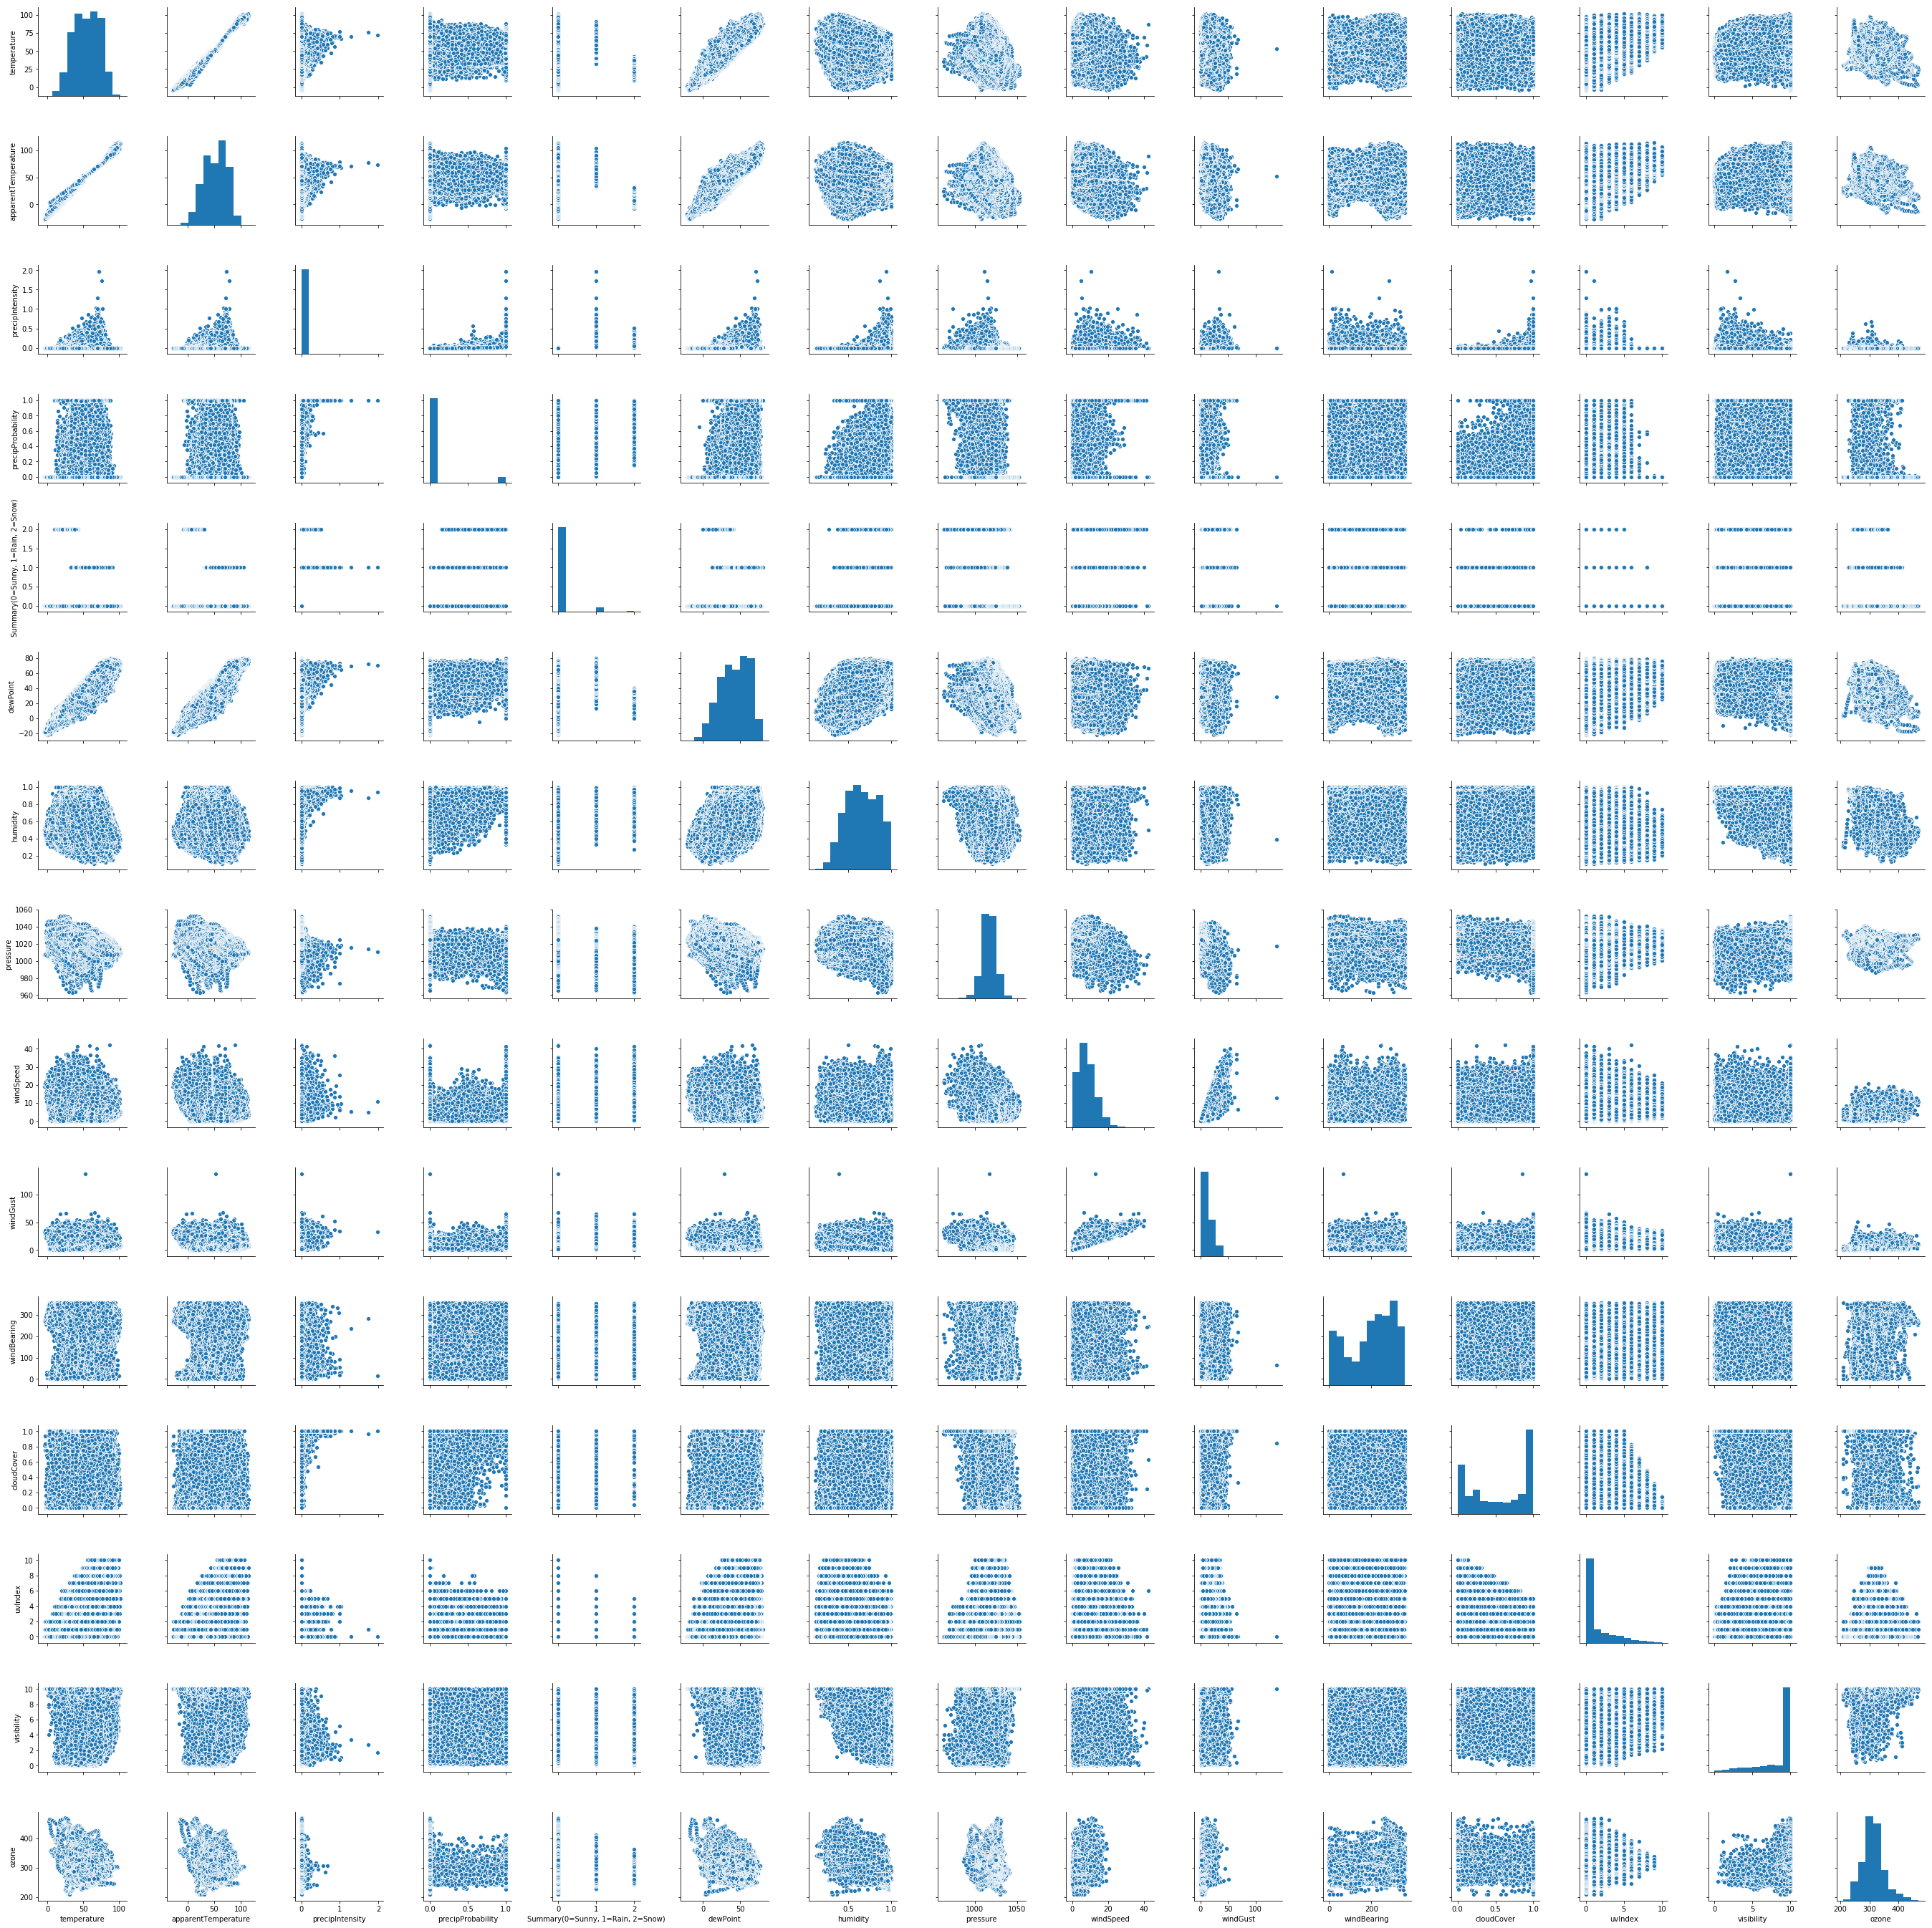

In [11]:
#Paiplots of the "darksky" dataset.
sns.pairplot(darksky) 

Text(45.125, 0.5, 'Dew Point')

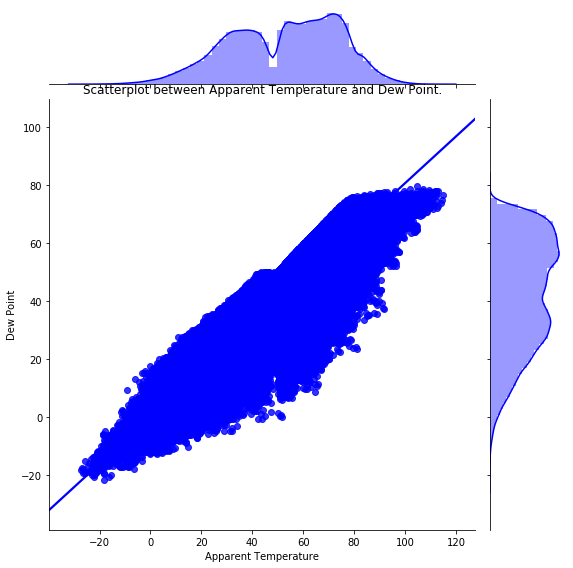

In [12]:
sns.jointplot(x="apparentTemperature",y="dewPoint",data=darksky,kind="reg",height=8, color='b') 
plt.title("Scatterplot between Apparent Temperature and Dew Point.")
plt.xlabel("Apparent Temperature")
plt.ylabel("Dew Point")

Text(45.125, 0.5, 'Dew Point')

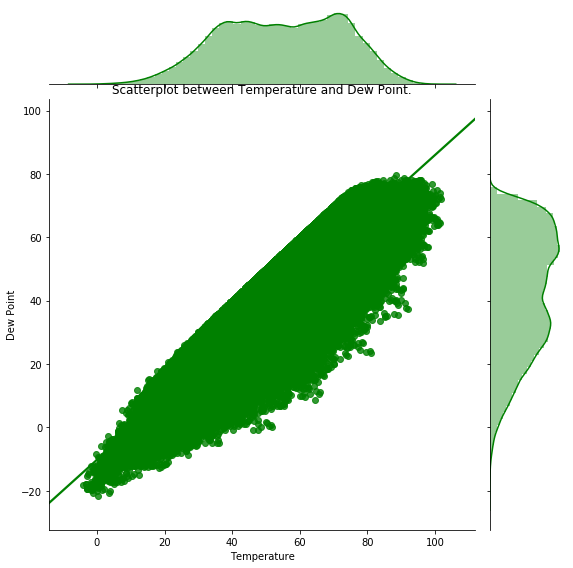

In [13]:
sns.jointplot(x="temperature",y="dewPoint",data=darksky,kind="reg",height=8, color='g') 
plt.title("Scatterplot between Temperature and Dew Point.")
plt.xlabel("Temperature")
plt.ylabel("Dew Point")

Text(45.125, 0.5, 'Temperature')

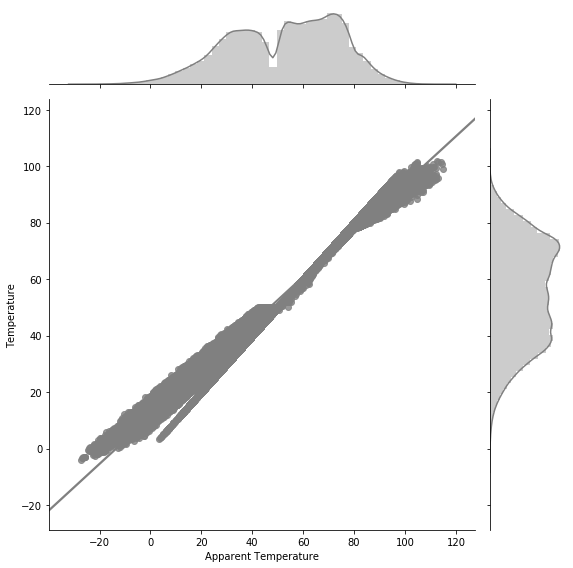

In [14]:
sns.jointplot(x="apparentTemperature",y="temperature",data=darksky,kind="reg",height=8, color='grey') 

plt.xlabel("Apparent Temperature")
plt.ylabel("Temperature")

C:\Users\Kowshik Kumar B\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Kowshik Kumar B\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'value')

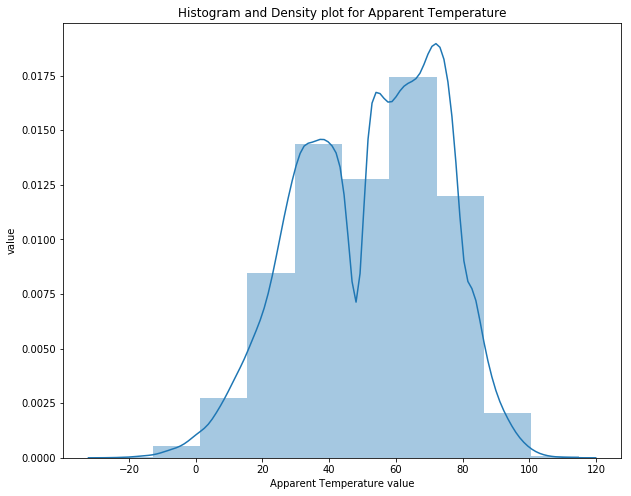

In [15]:
plt.figure(figsize=(10,8))
sns.distplot(a=darksky['apparentTemperature'],bins=10,hist=True)
plt.title("Histogram and Density plot for Apparent Temperature")
plt.xlabel("Apparent Temperature value")
plt.ylabel("value")

Text(0, 0.5, 'value')

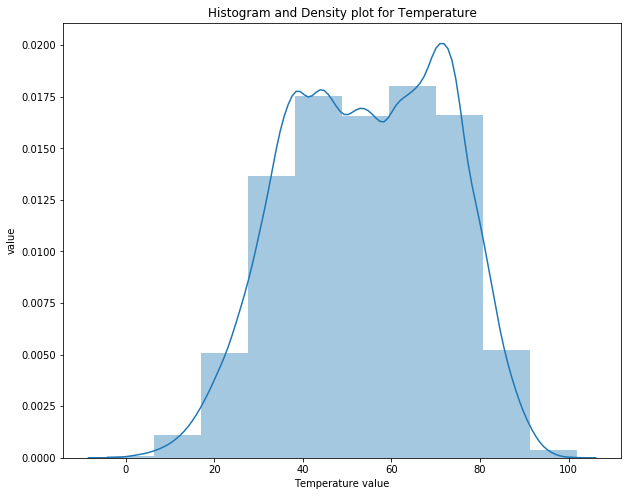

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(a=darksky['temperature'],bins=10,hist=True)
plt.title("Histogram and Density plot for Temperature")
plt.xlabel("Temperature value")
plt.ylabel("value")

Text(0, 0.5, 'value')

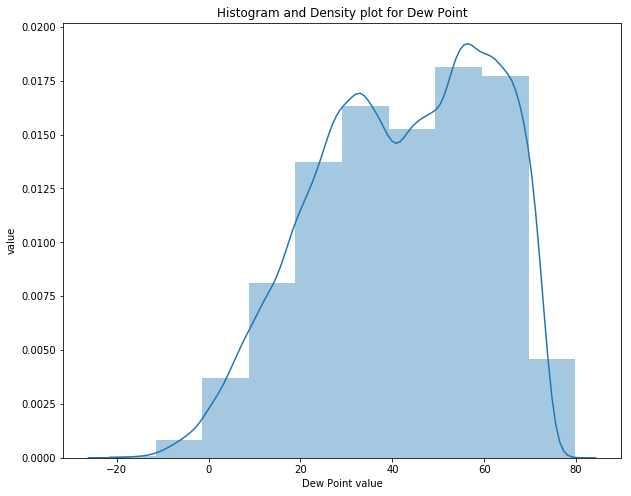

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(a=darksky['dewPoint'],bins=10,hist=True)
plt.title("Histogram and Density plot for Dew Point")
plt.xlabel("Dew Point value")
plt.ylabel("value")

Text(0, 0.5, 'value')

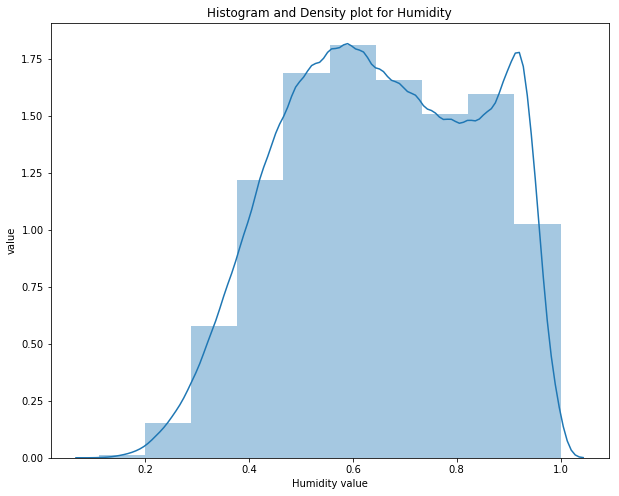

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(a=darksky['humidity'],bins=10,hist=True)
plt.title("Histogram and Density plot for Humidity")
plt.xlabel("Humidity value")
plt.ylabel("value")

Text(0, 0.5, 'Apparent Temperature')

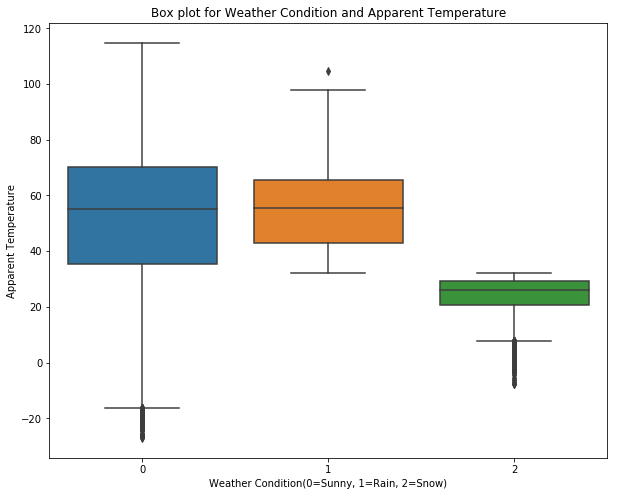

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Summary(0=Sunny, 1=Rain, 2=Snow)",y="apparentTemperature",data=darksky)
#sns.swarmplot(x="Summary(0=Sunny, 1=Rain, 2=Snow)",y="apparentTemperature",data=darksky)
plt.title("Box plot for Weather Condition and Apparent Temperature")
plt.xlabel("Weather Condition(0=Sunny, 1=Rain, 2=Snow)")
plt.ylabel("Apparent Temperature")

Text(0, 0.5, 'Humidity')

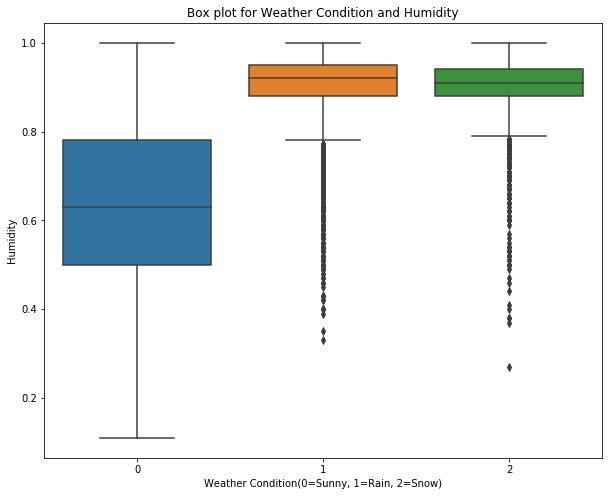

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Summary(0=Sunny, 1=Rain, 2=Snow)",y="humidity",data=darksky)
#sns.swarmplot(x="Summary(0=Sunny, 1=Rain, 2=Snow)",y="humidity",data=darksky)
plt.title("Box plot for Weather Condition and Humidity")
plt.xlabel("Weather Condition(0=Sunny, 1=Rain, 2=Snow)")
plt.ylabel("Humidity")

Text(0, 0.5, 'Precipitation Intensity')

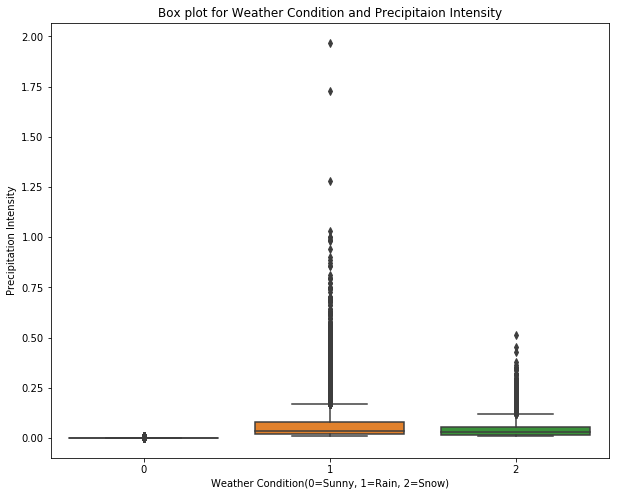

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Summary(0=Sunny, 1=Rain, 2=Snow)",y="precipIntensity",data=darksky)
#sns.swarmplot(x="Summary(0=Sunny, 1=Rain, 2=Snow)",y="precipIntensity",data=darksky)
plt.title("Box plot for Weather Condition and Precipitaion Intensity")
plt.xlabel("Weather Condition(0=Sunny, 1=Rain, 2=Snow)")
plt.ylabel("Precipitation Intensity")

In [16]:
#Formatting the 'time' variable into datetime formats.
pd.to_datetime(darksky['time']) 

0         1969-11-04 00:00:00-05:00
1         1969-11-04 01:00:00-05:00
2         1969-11-04 02:00:00-05:00
3         1969-11-04 03:00:00-05:00
4         1969-11-04 04:00:00-05:00
5         1969-11-04 05:00:00-05:00
6         1969-11-04 06:00:00-05:00
7         1969-11-04 07:00:00-05:00
8         1969-11-04 08:00:00-05:00
9         1969-11-04 09:00:00-05:00
10        1969-11-04 10:00:00-05:00
11        1969-11-04 11:00:00-05:00
12        1969-11-04 12:00:00-05:00
13        1969-11-04 13:00:00-05:00
14        1969-11-04 14:00:00-05:00
15        1969-11-04 15:00:00-05:00
16        1969-11-04 16:00:00-05:00
17        1969-11-04 17:00:00-05:00
18        1969-11-04 18:00:00-05:00
19        1969-11-04 19:00:00-05:00
20        1969-11-04 20:00:00-05:00
21        1969-11-04 21:00:00-05:00
22        1969-11-04 22:00:00-05:00
23        1969-11-04 23:00:00-05:00
24        1969-11-05 00:00:00-05:00
25        1969-11-05 01:00:00-05:00
26        1969-11-05 02:00:00-05:00
27        1969-11-05 03:00:0

In [17]:
#Tidying the dataset 
darksky['temperature']=darksky['temperature'].fillna(darksky['temperature'].mean())
darksky['apparentTemperature']=darksky['apparentTemperature'].fillna(darksky['apparentTemperature'].mean())
darksky['ozone']=darksky['ozone'].fillna(darksky['ozone'].mean())
darksky['windGust']=darksky['windGust'].fillna(darksky['windGust'].mean())
darksky['precipIntensity']=darksky['precipIntensity'].fillna(0)
darksky['precipProbability']=darksky['precipProbability'].fillna(0)
darksky['humidity']=darksky['humidity'].fillna(darksky['humidity'].mean())
darksky['pressure']=darksky['pressure'].fillna(darksky['pressure'].mean())
darksky['windSpeed']=darksky['windSpeed'].fillna(darksky['windSpeed'].mean())
darksky['windBearing']=darksky['windBearing'].fillna(darksky['windBearing'].mean())
darksky['cloudCover']=darksky['cloudCover'].fillna(darksky['cloudCover'].mean())
darksky['visibility']=darksky['visibility'].fillna(darksky['visibility'].mean())
darksky['dewPoint']=darksky['dewPoint'].fillna(darksky['dewPoint'].mean())
darksky['uvIndex']=darksky['uvIndex'].fillna(method='ffill')

In [18]:
#Accessing the first few rows of the "darksky" dataset after tidying.
darksky.head() 

time  temperature  apparentTemperature  \
0  1969-11-04 00:00:00-05:00        56.01                56.01   
1  1969-11-04 01:00:00-05:00        56.58                56.58   
2  1969-11-04 02:00:00-05:00        56.01                56.01   
3  1969-11-04 03:00:00-05:00        56.01                56.01   
4  1969-11-04 04:00:00-05:00        57.51                57.51   

   precipIntensity  precipProbability  Summary(0=Sunny, 1=Rain, 2=Snow)  \
0              0.0                0.0                                 0   
1              0.0                0.0                                 0   
2              0.0                0.0                                 0   
3              0.0                0.0                                 0   
4              0.0                0.0                                 0   

   dewPoint  humidity  pressure  windSpeed   windGust  windBearing  \
0     55.81      0.99    1012.9       6.42  12.324219        167.0   
1     55.22      0.95    1012.2       8.73  12.324219        168.0   
2     55.81      0.99    1012.0       8.70  12.324219        169.0   
3     55.04      0.97    1011.0       8.86  12.324219        150.0   
4     55.26      0.92    1010.8       6.96  12.324219        138.0   

   cloudCover  uvIndex  visibility       ozone  
0         1.0      0.0       0.120  313.243439  
1         1.0      0.0       0.274  313.243439  
2         1.0      0.0       0.000  313.243439  
3         1.0      0.0       0.000  313.243439  
4         1.0      0.0       0.455  313.243439

In [19]:
#Checking for total number of NA values in each variable of the "darksky" dataset after tidying.
darksky.isna().sum()

time                                0
temperature                         0
apparentTemperature                 0
precipIntensity                     0
precipProbability                   0
Summary(0=Sunny, 1=Rain, 2=Snow)    0
dewPoint                            0
humidity                            0
pressure                            0
windSpeed                           0
windGust                            0
windBearing                         0
cloudCover                          0
uvIndex                             0
visibility                          0
ozone                               0
dtype: int64

In [20]:
#Initializing the values of the Dependent and Predictor vairables.
#NOTE#Only Significant Variables are kept in the model and rest were eliminated by using Backward Propogation Elimination Method.
X = darksky[['precipIntensity','humidity','pressure','windSpeed','windBearing','cloudCover','visibility','ozone']].values
y = darksky['temperature'].values

In [21]:
#Splitting the dataset into Train(80%) and Test(20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
#Performing the Multiple Linear Regression.
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
#Checking for the Analysis of Variance Summary of the final model.
X_OLS=sm.add_constant(X_train)
sm.OLS(y_train,X_OLS).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     4857.
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:43:06   Log-Likelihood:            -1.4889e+06
No. Observations:              350587   AIC:                         2.978e+06
Df Residuals:                  350578   BIC:                         2.978e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        725.6218      4.440    163.411      0.000     716.919     734.325
x1           -21.2214      1.234    -17.197      0.000     -23.640     -18.803
x2           -11.8909      0.219    -54.328      0.000     -12.320     -11.462
x3            -0.6160      0.004   -156.243      0.000      -0.624      -0.608
x4            -0.8351      0.006   -129.076      0.000      -0.848      -0.822
x5            -0.0192      0.000    -62.346      0.000      -0.020      -0.019
x6            -1.8081      0.089    -20.237      0.000      -1.983      -1.633
x7            -0.6385      0.016    -41.040      0.000      -0.669      -0.608
x8            -0.0627      0.005    -11.564      0.000      -0.073      -0.052
==============================================================================
Omnibus:                    25195.496   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9378.077
Skew:                          -0.133   Prob(JB):                         0.00
Kurtosis:                       2.244   Cond. No.                     1.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Checking for the Coefficient values of the Linear Regression Equation.
coefficient_df = pd.DataFrame(model.coef_,['precipIntensity','humidity','pressure','windSpeed','windBearing','cloudCover','visibility','ozone'], columns=['Coefficient'])  
coefficient_df

Coefficient
precipIntensity   -21.221429
humidity          -11.890905
pressure           -0.616033
windSpeed          -0.835103
windBearing        -0.019178
cloudCover         -1.808141
visibility         -0.638458
ozone              -0.062701

In [25]:
#Checking for the Intercept value of the Linear Regression Equation.
model.intercept_

725.6217819062417

In [26]:
y_pred = model.predict(X_test)

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

Actual  Predicted
0   43.74  51.117156
1   54.98  58.094845
2   39.37  51.777330
3   49.59  65.730852
4   64.94  53.001724
5   62.90  48.766629
6   49.81  55.288347
7   71.42  60.067791
8   40.60  62.802938
9   68.27  58.848502

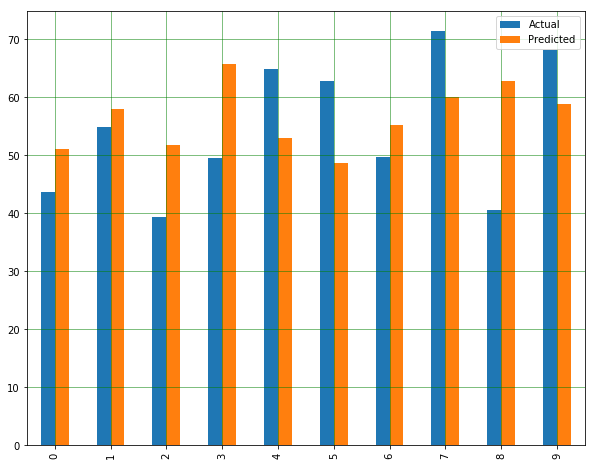

In [28]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [29]:
metrics.mean_absolute_error(y_test, y_pred)               #MAE

14.288793705290916

In [30]:
metrics.mean_squared_error(y_test, y_pred)                #MSE

286.9381893661562

In [31]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))       #RSME

16.939249964687228

In [51]:
darksky_time=darksky.drop(columns =['apparentTemperature','precipIntensity','precipProbability','Summary(0=Sunny, 1=Rain, 2=Snow)','dewPoint','humidity','pressure','windSpeed','windGust','windBearing','cloudCover','uvIndex','visibility','ozone'],axis=1, inplace = True)

#darksky_timeseries.head()
#darksky_timeseries.tail()

KeyError: "['apparentTemperature' 'precipIntensity' 'precipProbability'\n 'Summary(0=Sunny, 1=Rain, 2=Snow)' 'dewPoint' 'humidity' 'pressure'\n 'windSpeed' 'windGust' 'windBearing' 'cloudCover' 'uvIndex' 'visibility'\n 'ozone'] not found in axis"

In [7]:
darksky_timeseries.temperature.plot(figsize=(10,8))
plt.title('Temperature Patterns')
plt.ylabel('Temperature')
plt.show()

NameError: name 'darksky_timeseries' is not defined